### Project Introduction

The goal of this project is to build a machine learning model that can help predict the winner of English Premier League soccer matches. We will be able to apply this model to future matches.

### Global Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn 
pd.options.display.max_rows=999
pd.options.display.max_columns=999

### Reading in the Data Set

In [2]:
matches = pd.read_csv('matches.csv', index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,52698.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 42
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1389 non-null   object 
 1   time          1389 non-null   object 
 2   comp          1389 non-null   object 
 3   round         1389 non-null   object 
 4   day           1389 non-null   object 
 5   venue         1389 non-null   object 
 6   result        1389 non-null   object 
 7   gf            1389 non-null   float64
 8   ga            1389 non-null   float64
 9   opponent      1389 non-null   object 
 10  xg            1389 non-null   float64
 11  xga           1389 non-null   float64
 12  poss          1389 non-null   float64
 13  attendance    693 non-null    float64
 14  captain       1389 non-null   object 
 15  formation     1389 non-null   object 
 16  referee       1389 non-null   object 
 17  match report  1389 non-null   object 
 18  notes         0 non-null      

In [4]:
matches.shape

(1389, 27)

### Investigating Missing Data

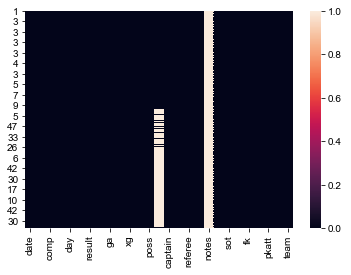

In [5]:
import seaborn as sns
sns.heatmap(matches.isnull()) #building a heatmap to visualize null rows
sns.set(rc={'figure.figsize':(8,8)}) #adjusting figure size

In [6]:
matches.isnull().sum().sort_values(ascending=False) #same as above, but in a table

notes           1389
attendance       696
dist               1
captain            0
season             0
pkatt              0
pk                 0
fk                 0
sot                0
sh                 0
match report       0
referee            0
formation          0
date               0
time               0
poss               0
xga                0
xg                 0
opponent           0
ga                 0
gf                 0
result             0
venue              0
day                0
round              0
comp               0
team               0
dtype: int64

In the EPL, the 20 teams play 38 matches in a season, and we are supposed to have data for two seasons in our file. Additionally, we know that three teams are relegated each season and three are promoted. Based on this, we should have 17 teams with 78 matches worth of data, and 6 teams with 38 matches. Let us take a look.

In [7]:
missing_rows = ((2*38*17) + (6*38)) - matches.shape[0]

In [8]:
missing_rows

131

In [9]:
matches['team'].value_counts()

Southampton                 72
West Ham United             72
Newcastle United            72
Manchester United           72
Brighton and Hove Albion    72
Burnley                     71
Tottenham Hotspur           71
Wolverhampton Wanderers     71
Manchester City             71
Crystal Palace              71
Leeds United                71
Arsenal                     71
Leicester City              70
Aston Villa                 70
Everton                     70
Chelsea                     70
Sheffield United            38
West Bromwich Albion        38
Liverpool                   38
Fulham                      38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

It looks odd that Liverpool has only 38 matches, given that they definitely weren't relegated (they're a decent team!). Let us look at what is happening there.

In [10]:
matches[matches['team']=='Liverpool']

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,3.3,0.6,50.0,NaN,Jordan Henderson,4-3-3,Michael Oliver,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,2.6,1.0,61.0,NaN,Jordan Henderson,4-3-3,Paul Tierney,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,3.2,1.2,67.0,NaN,Virgil van Dijk,4-3-3,Craig Pawson,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,1.8,3.9,69.0,NaN,Virgil van Dijk,4-3-3,Martin Atkinson,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,2.2,1.3,57.0,NaN,Jordan Henderson,4-3-3,Michael Oliver,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,2.5,1.5,61.0,NaN,Jordan Henderson,4-2-3-1,Mike Dean,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,1.8,0.5,73.0,NaN,Jordan Henderson,4-3-3,Kevin Friend,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,1.4,1.6,46.0,NaN,Jordan Henderson,4-2-3-1,Craig Pawson,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,3.7,1.3,56.0,NaN,James Milner,4-3-3,Chris Kavanagh,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool
16,2020-11-28,12:30,Premier League,Matchweek 10,Sat,Away,D,1.0,1.0,Brighton,0.5,2.1,60.0,NaN,James Milner,4-3-3,Stuart Attwell,Match Report,NaN,6.0,2.0,20.9,0.0,0.0,0.0,2021,Liverpool


Looks like we only have data for the first season for Liverpool. That is fine, at least it explains that this is not due to any incorrect information around relegation.

### Cleaning Data for ML

In [16]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [17]:
#converting date column from a string to datetime format
matches['date'] = pd.to_datetime(matches['date'])

### Creating Predictors (Feature Columns) to Use

In [19]:
matches['venue_code'] = matches['venue'].astype('category').cat.codes

In [21]:
matches['opp_code'] = matches['opponent'].astype('category').cat.codes

In [24]:
matches['hour'] = matches['time'].str[:2].astype('int')

In [28]:
matches['day_code'] = matches['date'].dt.dayofweek

In [37]:
matches['target'] = (matches['result']=='W').astype('int')

In [39]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,52698.0,Fernandinho,4-3-3,Jonathan Moss,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0


### Training an Initial ML Model

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

features = ['venue_code','opp_code','hour','day_code']
target = 'target'

#split into train and test
train_df = matches[matches['date'] < '2022-01-01']
test_df = matches[matches['date'] >= '2022-01-01']

#training the model
rf.fit(train_df[features],train_df[target])

#predicting
predictions = rf.predict(test_df[features])

#measuring precision
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_df['target'], predictions)
print(acc)

0.6134751773049646


In [80]:
combined = pd.DataFrame(dict(actual=test_df['target'],prediction = predictions))
combined.head()

,actual,prediction
29,1,0
31,1,0
32,0,0
34,1,0
35,1,1


In [81]:
pd.crosstab(index=combined['actual'],columns=combined['prediction'])

prediction,0,1
actual,,
0,143,32
1,77,30


For our use case, accuracy is not a great metric. Our model does not do well at all at those instances where we predict the team to win. 

We will instead use precision as a metric to determine the effectiveness of the model.

In [85]:
from sklearn.metrics import precision_score
precision = precision_score(test_df['target'],predictions)
precision

0.4838709677419355

### Enhancing our list of predictors with rolling averages

In [123]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [124]:
cols = ['gf', 'ga','sh', 'sot', 'dist', 'fk', 'pk','pkatt']
new_cols = [f'{c}_rolling' for c in cols]

In [152]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

Now we will run the rolling_averages function for each team (group)

In [128]:
matches_rolling = matches.groupby('team').apply(lambda x: rolling_averages(x,cols,new_cols))
matches_rolling.head()

date   time            comp        round  day venue result  \
team                                                                          
Arsenal 6  2020-10-04  14:00  Premier League  Matchweek 4  Sun  Home      W   
        7  2020-10-17  17:30  Premier League  Matchweek 5  Sat  Away      L   
        9  2020-10-25  19:15  Premier League  Matchweek 6  Sun  Home      L   
        11 2020-11-01  16:30  Premier League  Matchweek 7  Sun  Away      W   
        13 2020-11-08  19:15  Premier League  Matchweek 8  Sun  Home      L   

             gf   ga         opponent   xg  xga  poss  attendance  \
team                                                                
Arsenal 6   2.0  1.0    Sheffield Utd  0.4  0.2  63.0         NaN   
        7   0.0  1.0  Manchester City  0.9  1.5  41.0         NaN   
        9   0.0  1.0   Leicester City  0.9  1.2  57.0         NaN   
        11  1.0  0.0   Manchester Utd  1.1  0.3  47.0         NaN   
        13  0.0  3.0      Aston Villa  1.5  1.7  58.0         NaN   

                              captain formation          referee  \
team                                                               
Arsenal 6   Pierre-Emerick Aubameyang     4-3-3        Lee Mason   
        7   Pierre-Emerick Aubameyang     3-4-3   Chris Kavanagh   
        9   Pierre-Emerick Aubameyang     3-4-3     Craig Pawson   
        11  Pierre-Emerick Aubameyang     3-4-3        Mike Dean   
        13  Pierre-Emerick Aubameyang     3-4-3  Martin Atkinson   

            match report  notes    sh  sot  dist   fk   pk  pkatt  season  \
team                                                                        
Arsenal 6   Match Report    NaN   6.0  5.0  16.7  0.0  0.0    0.0    2021   
        7   Match Report    NaN  11.0  3.0  18.2  2.0  0.0    0.0    2021   
        9   Match Report    NaN  12.0  4.0  13.2  1.0  0.0    0.0    2021   
        11  Match Report    NaN   6.0  1.0  22.7  0.0  1.0    1.0    2021   
        13  Match Report    NaN  13.0  2.0  15.6  0.0  0.0    0.0    2021   

               team  venue_code  opp_code  hour  day_code  target  gf_rolling  \
team                                                                            
Arsenal 6   Arsenal           1        16    14         6       1    2.000000   
        7   Arsenal           0        12    17         5       0    1.666667   
        9   Arsenal           1        10    19         6       0    1.000000   
        11  Arsenal           0        13    16         6       1    0.666667   
        13  Arsenal           1         1    19         6       0    0.333333   

            ga_rolling  sh_rolling  sot_rolling  dist_rolling  fk_rolling  \
team                                                                        
Arsenal 6     1.333333    7.666667     3.666667     14.733333    0.666667   
        7     1.666667    5.333333     3.666667     15.766667    0.000000   
        9     1.666667    7.000000     3.666667     16.733333    0.666667   
        11    1.000000    9.666667     4.000000     16.033333    1.000000   
        13    0.666667    9.666667     2.666667     18.033333    1.000000   

            pk_rolling  pkatt_rolling  
team                                   
Arsenal 6     0.000000       0.000000  
        7     0.000000       0.000000  
        9     0.000000       0.000000  
        11    0.000000       0.000000  
        13    0.333333       0.333333

In [129]:
matches_rolling = matches_rolling.droplevel('team')
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,0.2,63.0,NaN,Pierre-Emerick Aubameyang,4-3-3,Lee Mason,Match Report,NaN,6.0,5.0,16.7,0.0,0.0,0.0,2021,Arsenal,1,16,14,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,1.5,41.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Chris Kavanagh,Match Report,NaN,11.0,3.0,18.2,2.0,0.0,0.0,2021,Arsenal,0,12,17,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,1.2,57.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Craig Pawson,Match Report,NaN,12.0,4.0,13.2,1.0,0.0,0.0,2021,Arsenal,1,10,19,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,0.3,47.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Mike Dean,Match Report,NaN,6.0,1.0,22.7,0.0,1.0,1.0,2021,Arsenal,0,13,16,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,1.7,58.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Martin Atkinson,Match Report,NaN,13.0,2.0,15.6,0.0,0.0,0.0,2021,Arsenal,1,1,19,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,0.5,60.0,39112.0,Conor Coady,3-5-2,Michael Oliver,Match Report,NaN,14.0,3.0,20.7,0.0,0.0,0.0,2022,Wolverhampton Wanderers,0,7,14,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,2.2,47.0,31842.0,Conor Coady,3-4-3,Kevin Friend,Match Report,NaN,14.0,8.0,20.6,0.0,0.0,0.0,2022,Wolverhampton Wanderers,1,9,20,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,2.1,49.0,31012.0,Conor Coady,3-4-3,Darren England,Match Report,NaN,11.0,4.0,14.3,0.0,0.0,0.0,2022,Wolverhampton Wanderers,1,1,15,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,1.6,58.0,52164.0,Conor Coady,3-4-3,Peter Bankes,Match Report,NaN,5.0,2.0,18.0,0.0,0.0,0.0,2022,Wolverhampton Wanderers,0,14,20,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [148]:
matches_rolling = matches_rolling.reset_index(drop=True)
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,xg,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,0.2,63.0,NaN,Pierre-Emerick Aubameyang,4-3-3,Lee Mason,Match Report,NaN,6.0,5.0,16.7,0.0,0.0,0.0,2021,Arsenal,1,16,14,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,1.5,41.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Chris Kavanagh,Match Report,NaN,11.0,3.0,18.2,2.0,0.0,0.0,2021,Arsenal,0,12,17,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,1.2,57.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Craig Pawson,Match Report,NaN,12.0,4.0,13.2,1.0,0.0,0.0,2021,Arsenal,1,10,19,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,0.3,47.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Mike Dean,Match Report,NaN,6.0,1.0,22.7,0.0,1.0,1.0,2021,Arsenal,0,13,16,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,1.7,58.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Martin Atkinson,Match Report,NaN,13.0,2.0,15.6,0.0,0.0,0.0,2021,Arsenal,1,1,19,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,0.5,60.0,39112.0,Conor Coady,3-5-2,Michael Oliver,Match Report,NaN,14.0,3.0,20.7,0.0,0.0,0.0,2022,Wolverhampton Wanderers,0,7,14,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
1313,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,2.2,47.0,31842.0,Conor Coady,3-4-3,Kevin Friend,Match Report,NaN,14.0,8.0,20.6,0.0,0.0,0.0,2022,Wolverhampton Wanderers,1,9,20,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
1314,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,2.1,49.0,31012.0,Conor Coady,3-4-3,Darren England,Match Report,NaN,11.0,4.0,14.3,0.0,0.0,0.0,2022,Wolverhampton Wanderers,1,1,15,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
1315,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,0.3,1.6,58.0,52164.0,Conor Coady,3-4-3,Peter Bankes,Match Report,NaN,5.0,2.0,18.0,0.0,0.0,0.0,2022,Wolverhampton Wanderers,0,14,20,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


matches_rolling is no the main data set

### Retraining our Model

In [173]:
predictors = features + new_cols
predictors

['venue_code',
 'opp_code',
 'hour',
 'day_code',
 'gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [156]:
def make_predictions(data, predictors):
    #train/test split
    train_df = data[data['date'] < '2022-01-01']
    test_df = data[data['date'] >= '2022-01-01']
    
    #training and predicting
    rf.fit(train_df[predictors], train_df['target'])
    predictions = rf.predict(test_df[predictors])
    
    #combining
    combined = pd.DataFrame(dict(actual=test_df['target'],prediction = predictions))

    #measuring precision
    prec = precision_score(test_df['target'],predictions)
    
    return combined, prec

In [157]:
combined, prec = make_predictions(matches_rolling, predictors)

In [158]:
prec

0.6326530612244898

We managed to improve precision significantly 

In [160]:
combined = combined.merge(matches_rolling[['date','team','opponent','result']], left_index=True, right_index=True)
combined

,actual,prediction,date,team,opponent,result
54,0,1,2022-01-01,Arsenal,Manchester City,L
55,0,1,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
60,1,1,2022-03-13,Arsenal,Leicester City,W
61,0,0,2022-03-16,Arsenal,Liverpool,L
62,1,0,2022-03-19,Arsenal,Aston Villa,W
63,0,0,2022-04-04,Arsenal,Crystal Palace,L


### Combining Home and Away Predictions

Currently our model is predicting both sides of the match. For the home team as well as the away team. In some instances it may have a different prediction for each. We should only use the predictions that it got right on both sides.

Currently the naming conventions in the 'team' and 'opponent' columns are slightly different so we will need to fix these so to allow for easy joining.

In [174]:
class MissingDict(dict): #have to do this to avoid typing out all names (even if correct on both sides)
    __missing__ = lambda self, key:key

map_values = {"Brighton and Hove Albion": "Brighton", 
              "Manchester United": "Manchester Utd",
              "Newcastle United": "Newcastle Utd", 
              "Tottenham Hotspur": "Tottenham", 
              "West Ham United": "West Ham", 
              "Wolverhampton Wanderers": "Wolves"}

mapping = MissingDict(map_values)

In [165]:
mapping["West Ham United"]

'West Ham'

In [166]:
mapping["Arsenal"]

'Arsenal'

In [167]:
combined['new_team'] = combined['team'].map(mapping)
combined

,actual,prediction,date,team,opponent,result,new_team
54,0,1,2022-01-01,Arsenal,Manchester City,L,Arsenal
55,0,1,2022-01-23,Arsenal,Burnley,D,Arsenal
56,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal
57,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal
58,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal
59,1,1,2022-03-06,Arsenal,Watford,W,Arsenal
60,1,1,2022-03-13,Arsenal,Leicester City,W,Arsenal
61,0,0,2022-03-16,Arsenal,Liverpool,L,Arsenal
62,1,0,2022-03-19,Arsenal,Aston Villa,W,Arsenal
63,0,0,2022-04-04,Arsenal,Crystal Palace,L,Arsenal


In [175]:
merged = combined.merge(combined, left_on=['date','new_team'], right_on=['date','opponent'])
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,0,1,2022-01-01,Arsenal,Manchester City,L,Arsenal,1,0,Manchester City,Arsenal,W,Manchester City
1,0,1,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
2,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
3,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
4,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
5,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
6,1,1,2022-03-13,Arsenal,Leicester City,W,Arsenal,0,1,Leicester City,Arsenal,L,Leicester City
7,1,0,2022-03-19,Arsenal,Aston Villa,W,Arsenal,0,0,Aston Villa,Arsenal,L,Aston Villa
8,0,0,2022-04-04,Arsenal,Crystal Palace,L,Arsenal,1,0,Crystal Palace,Arsenal,W,Crystal Palace
9,0,0,2022-04-09,Arsenal,Brighton,L,Arsenal,1,0,Brighton and Hove Albion,Arsenal,W,Brighton


In [176]:
merged[(merged['prediction_x']==1) & (merged['prediction_y']==0)]['actual_x'].value_counts()

1    26
0    12
Name: actual_x, dtype: int64

In [177]:
26/38

0.6842105263157895

The interesting thing about this last section was that it had nothing to do with ML directly. It was about understanding this problem and the data set as a whole.